# Konsentrasjonsfordelingen til en treprotisk syre

Dette programmet skal inneholde en funksjon som regner ut konsentrasjonene til SPECIES av en treprotisk syre. Programmet skal lage et tilsvarende plot for arsensyre som for fosforsyre på side 221 i læreboken. Plottet viser sammenhengen mellom pH og konsentrasjonene av de forskjellige SPIECIES til den treprotiske syren.


Mye av koden er ferdigskrevet. De stedene hvor du skal fylle inn kode er markert slik:
 
```
        # FORKLARING PÅ HVA SOM SKAL KODES
```

Du kjører koden ved å trykke:   shift + enter


HUSK: Programmet vil lagre variabler og funksjoner når du kjører bitene av programmet. For å unngå feil bør du nullstille "output"-en ofte. Dette gjør du slik:
    - klikk på "Cell"
    - velg "All Output"
    - klikk på "Clear"
    
 ````
````


Funksjonen `triprotic_acid` regner ut returnerer konsentrasjonene til alle fire SPECIES til en tre-protisk syre. Syrekonstantene $K_{a1}$, $K_{a2}$ og $K_{a3}$ samt pH-verdien til løsningen tas inn som parameter. 

`p` er konsentrasjonen proton i løsningen, eller $[H^+]$.

Plottet som lages senere i programmet vil være for arsensyre. I funksjonen vil variabelnavnene for konsentrasjonene som skal regnes ut da være som følger:  

`H3X ` $= [H_{3}AsO_{4}]$

`H2X ` $= [H_{2}AsO_{4}^{-1}]$

`HX ` $= [HAsO_{4}^{-2}]$

`X ` $= [AsO_{4}^{-3}]$

Forklaring på hvordan konsentrasjonene regnes ut finner du i læreboken på side 221. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def triprotic_acid(pH, Ka1, Ka2, Ka3):
    ''' calculates concentration. 
    1 M solution of a triprotic acid.
    Ka is the acid dissociation constant.'''
    p = 10**(-pH)    
    H3X = 1/(1 + Ka1/p + Ka1*Ka2/p**2 + Ka1*Ka2*Ka3/p**3) 
    H2X = H3X*Ka1/p         
    HX= H2X*Ka2/p   
    X = HX*Ka3/p             
    return H3X, H2X, HX, X 

TIL LÆRERE:

Det er ingen testfunksjon til denne oppgaven, men det ligner såpass på det som er i boken at man kan lett forstå om man har gjort riktig. Hvis man gjør feil, vil nok oftest plottet se veldig annerledes ut.


Slik ser plottet ut i boken:

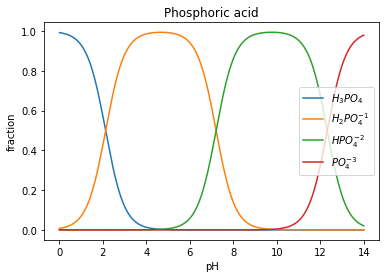

In [2]:
N = 400
pH = np.linspace(1e-5, 14, N)

# phosphoric acid

H3PO4 = np.zeros(N)
H2PO4 = np.zeros(N)
HPO4 = np.zeros(N)
PO4 = np.zeros(N)

H3PO4, H2PO4, HPO4, PO4 = triprotic_acid(pH, 7.5e-3, 6.2e-8, 4.8e-13)

plt.plot(pH, H3PO4, label='$H_{3}PO_{4}$')
plt.plot(pH, H2PO4, label='$H_{2}PO_{4}^{-1}$')
plt.plot(pH, HPO4, label='$HPO_{4}^{-2}$')
plt.plot(pH, PO4, label='$PO_{4}^{-3}$')
plt.legend()
plt.title('Phosphoric acid')
plt.xlabel('pH')
plt.ylabel('fraction')
plt.show()

Koden for plotting under er ferdigskrevet. Alt du trenger å gjøre, er å kjøre koden.

Her er en forklaring på hva som skjer i koden under:

`pH` er et array med pH-verdier fra (nesten) null til 14. Det blir opprettet tomme array til hvert av SPECIES, som er like store som `pH`. `triprotic_acid` blir så kalt på med hele arrayet `pH`, og de tomme arrayene til SPECIES blir fylt opp med utregnet konsentrasjon for hver pH-verdi i arrayet. Alle SPECIES plottes så mot pH i samme plot. 

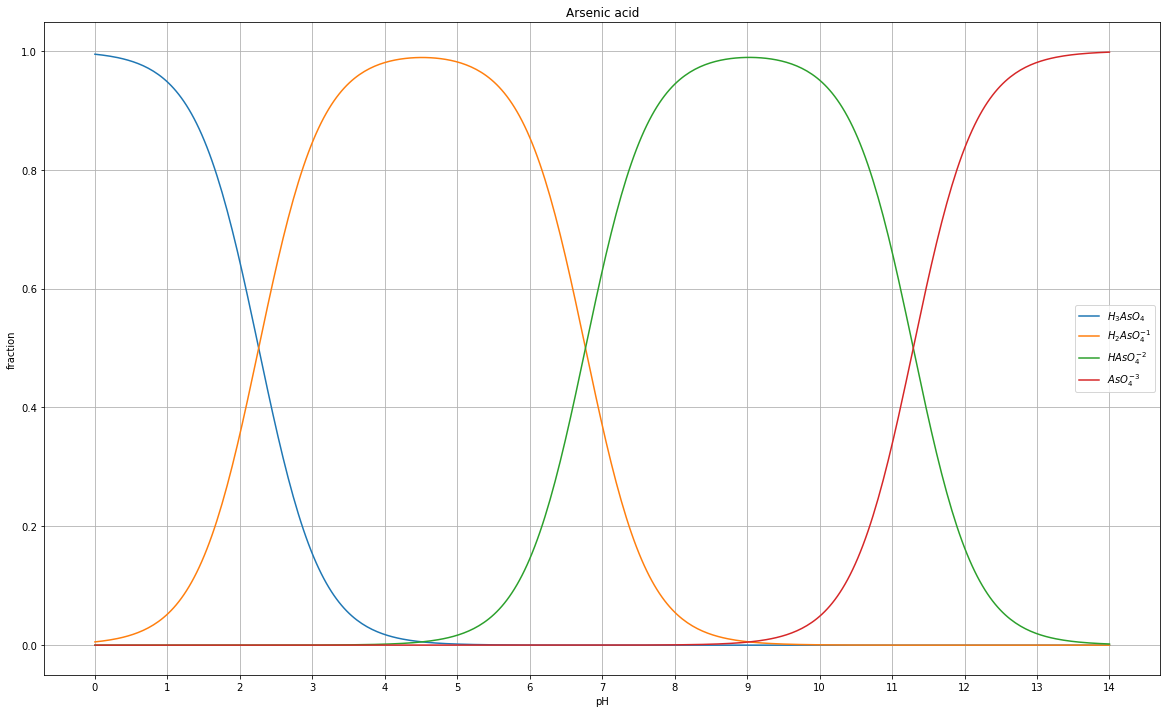

In [3]:
N = 400
pH = np.linspace(1e-5, 14, N)

''' arsenic acid'''
Ka1 = 5.5e-3
Ka2 = 1.7e-7
Ka3 = 5.1e-12

'''
Ka1 =
Ka2 = 
Ka3 = 
'''

H3AsO4 = np.zeros(N)
H2AsO4 = np.zeros(N)
HAsO4 = np.zeros(N)
AsO4 = np.zeros(N)

H3AsO4, H2AsO4, HAsO4, AsO4 = triprotic_acid(pH, Ka1, Ka2, Ka3)

plt.figure(figsize=(20,12))
plt.plot(pH, H3AsO4, label='$H_{3}AsO_{4}$')
plt.plot(pH, H2AsO4, label='$H_{2}AsO_{4}^{-1}$')
plt.plot(pH, HAsO4, label='$HAsO_{4}^{-2}$')
plt.plot(pH, AsO4, label='$AsO_{4}^{-3}$')
plt.legend()
plt.xticks(range(15))
plt.grid(True)
plt.title('Arsenic acid')
plt.xlabel('pH')
plt.ylabel('fraction')
plt.show()

Bestem pKa-en for de tre protolysetrinnene ved å studere grafen.


SVAR:
nøyaktige løsninger er 2.25963731051, 6.76955107862 og 11.2924298239. 

TIL LÆRERE:

Det er ikke noe problem å bruke funksjonen til to-protiske syrer også. Det gjøres enkelt ved å sette Ka3 til 0. Dette leddet faller da bare bort ved utregning av, i dette tilfellet, $ H_2CO_3 $, og den siste konsentrasjonen som returneres vil være null. (Som stemmer ganske bra). Det eneste "problemet" er mer et estetisk problem, nemlig at variabelnavnene blir noe misvisende. 


Her er et plot som er helt likt side 218:

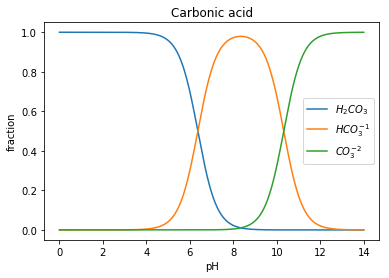

In [4]:
N = 400
pH = np.linspace(1e-5, 14, N)

# Carbonic acid
Ka1 = 4.3e-7
Ka2 = 4.8e-11
Ka3 = 0

nothing = np.zeros(N)
H2CO3 = np.zeros(N)
HCO3 = np.zeros(N)
CO3 = np.zeros(N)

H2CO3, HCO3, CO3, nothing = triprotic_acid(pH, Ka1, Ka2, Ka3)

plt.plot(pH, H2CO3, label='$H_{2}CO_{3}$')
plt.plot(pH, HCO3, label='$HCO_{3}^{-1}$')
plt.plot(pH, CO3, label='$CO_{3}^{-2}$')
plt.legend()
plt.title('Carbonic acid')
plt.xlabel('pH')
plt.ylabel('fraction')
plt.show()